<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Xception" data-toc-modified-id="Xception-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Xception</a></span></li><li><span><a href="#What-is-ImageNet?" data-toc-modified-id="What-is-ImageNet?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is ImageNet?</a></span></li><li><span><a href="#Xception-Model" data-toc-modified-id="Xception-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Xception Model</a></span></li></ul></div>

# Xception
Xception networks use two basic blocks: a depthwise convolution and a pointwise
convolution. A depthwise convolution is the channel-wise n × n spatial convolution.
Suppose an image has three channels, then we have three convolutions of n × n.
A pointwise convolution is a 1×1 convolution. In Xception – an "extreme" version
of an Inception module – we first use a 1×1 convolution to map cross-channel
correlations, and then separately map the spatial correlations of every output.

# What is ImageNet?
ImageNet is a project intended to label and categorize Images manually. in the field of Deep Learning and Convolutional Neural Networks, we will refer ImageNet as “ImageNet Large Scale Visual Recognition Challenge” in short ILSVRC.

The main objective of this ImageNet project is to train a model, which can classify an Input Image into 1000 separate object categories.

Categories include species of dogs, cats, fish, Vehicle types include vehicle parts like wheels, steering, etc to know more Categories refer
The models are trained on approximately 1.2 million Images and additional 50000 images for validation and 100,000 images for testing.

for Image Recognition, we can use pre-trained models available in the Keras core library. the models like VCG16, VCG19, Resnet50, Inception V3, Xception models

# Xception Model
Xception Model is proposed by Francois Chollet. Xception is an extension of the inception Architecture which replaces the standard Inception modules with depthwise Separable Convolutions.

In [6]:
"""

This script based on examples provided in the keras documentation and a blog.
"Building powerful image classification models using very little data"
from blog.keras.io.

Dataset: Subset of Kaggle Dataset
https://www.kaggle.com/c/dogs-vs-cats/data
- cat pictures index 0-999 in data/train/cats
- cat pictures index 1000-1400 in data/validation/cats
- dogs pictures index 0-999 in data/train/dogs
- dog pictures index 1000-1400 in data/validation/dogs

Example: Dogs vs Cats (Directory Structure)
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...

Example has 1000 training examples for each class, and 400 validation examples for each class.
The data folder already contains the dogs vs cat data you simply need to run script. For the dogs_cats classification
you can find a model already trained in the model folder. Feel free to create your own data.
"""

import sys
import os
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as k

# fix seed for reproducible results (only works on CPU, not GPU)
seed = 9
np.random.seed(seed=seed)
# tf.set_random_seed(seed=seed)

# hyper parameters for model
nb_classes = 2  # number of classes
based_model_last_block_layer_number = 126  # value is based on based model selected.
img_width, img_height = 299, 299  # change based on the shape/structure of your images
batch_size = 32  # try 4, 8, 16, 32, 64, 128, 256 dependent on CPU/GPU memory capacity (powers of 2 values).
nb_epoch = 50  # number of iteration the algorithm gets trained.
learn_rate = 1e-4  # sgd learning rate
momentum = .9  # sgd momentum to avoid local minimum
transformation_ratio = .05  # how aggressive will be the data augmentation/transformation


In [7]:
# Pre-Trained CNN Model using imagenet dataset for pre-trained weights
base_model = Xception(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False)

In [8]:
# Top Model Block
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(nb_classes, activation='softmax')(x)

In [9]:
# add your top layer block to your base model
model = Model(base_model.input, predictions)
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [10]:
# # let's visualize layer names and layer indices to see how many layers/blocks to re-train
# # uncomment when choosing based_model_last_block_layer
# for i, layer in enumerate(model.layers):
#     print(i, layer.name)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all layers of the based model that is already pre-trained.
for layer in base_model.layers:
    layer.trainable = False

In [11]:

# Read Data and Augment it: Make sure to select augmentations that are appropriate to your images.
# To save augmentations un-comment save lines and add to your flow parameters.
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=transformation_ratio,
                                   shear_range=transformation_ratio,
                                   zoom_range=transformation_ratio,
                                   cval=transformation_ratio,
                                   horizontal_flip=True,
                                   vertical_flip=True)

validation_datagen = ImageDataGenerator(rescale=1. / 255)



In [18]:
train_generator = train_datagen.flow_from_directory('./cats_and_dogs_filtered/train/',
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# save_to_dir=os.path.join(os.path.abspath(train_data_dir), '../preview')
# save_prefix='aug',
# save_format='jpeg')
# use the above 3 commented lines if you want to save and look at how the data augmentations look like

validation_generator = validation_datagen.flow_from_directory('./cats_and_dogs_filtered/validation/',
                                                              target_size=(img_width, img_height),
                                                              batch_size=batch_size,
                                                              class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:

model.compile(optimizer='nadam',
              loss='categorical_crossentropy',  # categorical_crossentropy if multi-class classifier
              metrics=['accuracy'])


In [48]:
# save weights of best training epoch: monitor either val_loss or val_acc

# top_weights_path = os.path.join(os.path.abspath("')
callbacks_list = [
    ModelCheckpoint('./save_model/Xception_model_weights.h5', monitor='val_acc', verbose=1, save_best_only=True),
    EarlyStopping(monitor='val_acc', patience=5, verbose=0)
]

In [49]:
# Train Simple CNN
history=model.fit_generator(train_generator,
#                     samples_per_epoch=train_generator.nb_sample,
                    nb_epoch=nb_epoch / 10,
                    validation_data=validation_generator,
#                     nb_val_samples=validation_generator.nb_sample,
                    callbacks=callbacks_list)



C:\Users\nemat\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
C:\Users\nemat\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., callbacks=[<keras.ca..., epochs=5.0)`
  import sys


Epoch 1/5
63/63 [==============================] - 37s 580ms/step - loss: 0.0368 - accuracy: 0.9840 - val_loss: 0.0196 - val_accuracy: 0.9950
Epoch 2/5
 1/63 [..............................] - ETA: 12s - loss: 0.0222 - accuracy: 1.0000

C:\Users\nemat\anaconda3\envs\tensorflow\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


63/63 [==============================] - 32s 500ms/step - loss: 0.0473 - accuracy: 0.9875 - val_loss: 0.0014 - val_accuracy: 0.9950
Epoch 3/5
63/63 [==============================] - 32s 500ms/step - loss: 0.0218 - accuracy: 0.9945 - val_loss: 8.3446e-07 - val_accuracy: 0.9910
Epoch 4/5
63/63 [==============================] - 32s 506ms/step - loss: 0.0210 - accuracy: 0.9950 - val_loss: 0.0026 - val_accuracy: 0.9930
Epoch 5/5
63/63 [==============================] - 31s 493ms/step - loss: 0.0223 - accuracy: 0.9935 - val_loss: 1.4901e-08 - val_accuracy: 0.9930


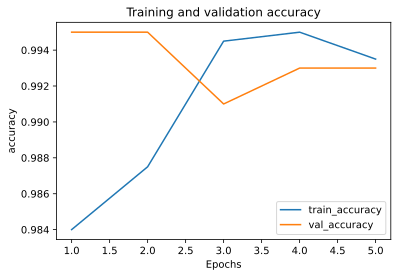

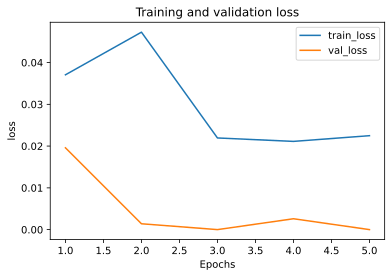

In [50]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    

plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

In [52]:

model.save('./save_model/Xception_model_weights.h5')


In [53]:
# add the best weights from the train top model
# at this point we have the pre-train weights of the base model and the trained weight of the new/added top model
# we re-load model weights to ensure the best epoch is selected and not the last one.
model.load_weights('./save_model/Xception_model_weights.h5')

In [54]:
# based_model_last_block_layer_number points to the layer in your model you want to train.
# For example if you want to train the last block of a 19 layer VGG16 model this should be 15
# If you want to train the last Two blocks of an Inception model it should be 172
# layers before this number will used the pre-trained weights, layers above and including this number
# will be re-trained based on the new data.
for layer in model.layers[:based_model_last_block_layer_number]:
    layer.trainable = False
for layer in model.layers[based_model_last_block_layer_number:]:
    layer.trainable = True

In [55]:
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
# save weights of best training epoch: monitor either val_loss or val_acc
# final_weights_path = os.path.join(os.path.abspath(), 'model_weights.h5')
# top_weights_path = os.path.join(os.path.abspath(""), 'Xception_model_weights.h5')
callbacks_list = [
    ModelCheckpoint("./save_model/final_model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=5, verbose=0)
]

In [59]:
# fine-tune the model
history=model.fit_generator(train_generator,
#                     batch_size=200,
                    nb_epoch=nb_epoch,
                    validation_data=validation_generator,
#                     nb_val_samples=validation_generator.nb_sample,
                    callbacks=callbacks_list)

C:\Users\nemat\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
C:\Users\nemat\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., callbacks=[<keras.ca..., epochs=50)`
  import sys


Epoch 1/50
63/63 [==============================] - 36s 579ms/step - loss: 0.0179 - accuracy: 0.9960 - val_loss: 7.9652e-05 - val_accuracy: 0.9900
Epoch 2/50
63/63 [==============================] - 31s 495ms/step - loss: 0.0165 - accuracy: 0.9960 - val_loss: 0.0230 - val_accuracy: 0.9950
Epoch 3/50
63/63 [==============================] - 31s 493ms/step - loss: 0.0194 - accuracy: 0.9935 - val_loss: 0.0182 - val_accuracy: 0.9860
Epoch 4/50
63/63 [==============================] - 31s 495ms/step - loss: 0.0134 - accuracy: 0.9965 - val_loss: 1.2964e-06 - val_accuracy: 0.9900
Epoch 5/50
63/63 [==============================] - 31s 498ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.6526 - val_accuracy: 0.9920
Epoch 6/50
63/63 [==============================] - 32s 500ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0000e+00 - val_accuracy: 0.9890
Epoch 7/50
63/63 [==============================] - 31s 499ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 5.9605e-07 - val_

In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    

plot_metric(train_model, 'accuracy')
plot_metric(train_model, 'loss')

NameError: name 'train_model' is not defined

In [ ]:
# save model
model_json = model.to_json()
with open(os.path.join(os.path.abspath("./save_model/"), 'Xception_model.json'), 'w') as json_file:
    json_file.write(model_json)



In [ ]:

# if __name__ == '__main__':
#     if not len(sys.argv) == 3:
#         print('Arguments must match:\npython code/train.py <data_dir/> <model_dir/>')
#         print('Example: python code/train.py data/dogs_cats/ model/dog_cats/')
#         sys.exit(2)
#     else:
#         data_dir = os.path.abspath(sys.argv[1])
#         train_dir = os.path.join(os.path.abspath(data_dir), 'train')  # Inside, each class should have it's own folder
#         validation_dir = os.path.join(os.path.abspath(data_dir), 'validation')  # each class should have it's own folder
#         model_dir = os.path.abspath(sys.argv[2])

#         os.makedirs(os.path.join(os.path.abspath(data_dir), 'preview'), exist_ok=True)
#         os.makedirs(model_dir, exist_ok=True)

#     train(train_dir, validation_dir, model_dir)  # train model

#     # release memory
#     k.clear_session()